# Coupling
This notebook investigates coupled motion using transfer matrices.

## Setup 

In [16]:
import sys
import numpy as np
import numpy.linalg as la
import matplotlib
from matplotlib import pyplot as plt, animation, lines
import proplot as plot

sys.path.append('/Users/46h/Research/code/accphys')
from tools import (
    plotting as myplt,
    animation as myanim,
    envelope_analysis as ea,
    coupling as BL,
    matrix_lattice,
    utils)
from tools.envelope_analysis import Envelope
from tools.matrix_lattice import MatrixLattice, fodo
from tools.utils import show, play

In [17]:
plot.rc['figure.facecolor'] = 'white'
plot.rc['cycle'] = 'default'
plot.rc['style'] = None # `None` for default proplot style
plot.rc['savefig.dpi'] = 'figure' # proplot default is 1200, which makes inline animations appear huge

## Create lattice 

In [18]:
L = 5.0
k1, k2 = 0.1, 0.1
lattice = fodo(k1, k2, L, fill_fac=0.5, quad_tilt=1, start='drift')

In [19]:
show(lattice.M, 'M', dec=3)
print()
lattice.print_params('2D')
print()
lattice.print_params('4D')

M =
⎡0.655   4.965  0.025   0.044⎤
⎢                            ⎥
⎢-0.032  1.28   0.012   0.025⎥
⎢                            ⎥
⎢0.019   0.036   1.28   4.965⎥
⎢                            ⎥
⎣0.006   0.019  -0.032  0.655⎦

2D lattice parameters
---------------------
mux = 14.63
muy = 14.63
nux = 0.04
nuy = 0.04
bx = 19.65
by = 19.65
ax = -1.24
ay = 1.24

4D lattice parameters
---------------------
a1x = -0.48
a1y = 0.48
a2x = -1.07
a2y = 1.07
b1x = 7.59
b1y = 7.59
b2x = 17.08
b2y = 17.08
u = 0.50
nu1 = -179.32
nu2 = -0.00
mu1 = 18.93
mu2 = 8.43


## Eigenvalues and eigenvectors 

Below the four eigenvalues are plotted in the complex plane. The eigenvalues will lie on the unit circle if the lattice is stable.

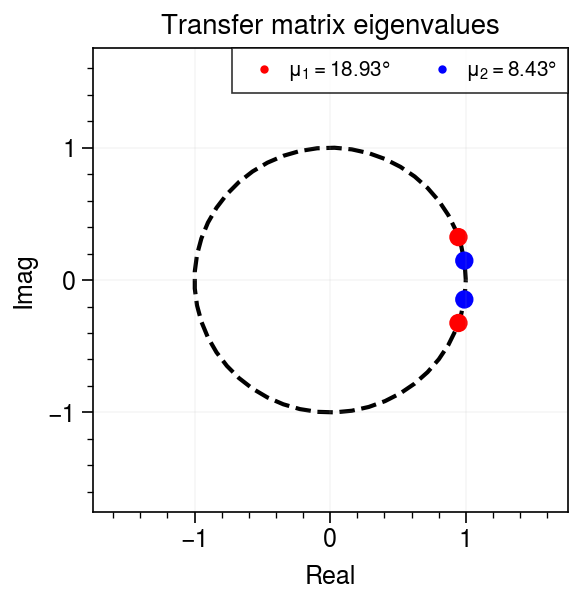

In [20]:
fig, ax = plot.subplots(figsize=(2.9, 3))
myplt.eigvals_complex_plane(ax, lattice.eigvals)
# ax.grid(alpha=0.2, color='lightgrey')
ax.set_title('Transfer matrix eigenvalues')
plt.savefig('eigvals.png', dpi=500, facecolor='white')

Track a particle which is a linear combination of the eigenvectors, i.e.:
$$
\mathbf{x} = Re \left[ \sqrt{\varepsilon_1}\mathbf{v}_1 e^{i\psi_1} + \sqrt{\varepsilon_2}\mathbf{v}_2 e^{i\psi_2} \right],
$$
where $\mathbf{v}_l$ are the eigenvectors, $\psi_l$ are initial phases, and $\varepsilon_l$ are initial amplitudes.

In [25]:
nturns = 100
eps4D = 10 # [mm-mrad]
ratio = 1 # eps2 / eps1
psi1 = np.radians(0)
psi2 = np.radians(90)
norm_coords = True

In [26]:
# Determine emittances from provided ratio
if ratio == 0:
    eps1 = eps4D
else:
    eps1 = np.sqrt(eps4D / ratio)
eps2 = ratio * eps1

# Form coordinate vector
v1, _, v2, _ = BL.normalize(lattice.eigvecs).T
x1 = np.real(np.sqrt(eps1) * v1 * np.exp(1j*psi1)) # mode 1 contribution
x2 = np.real(np.sqrt(eps2) * v2 * np.exp(1j*psi2)) # mode 2 contribution
x = x1 + x2

# Track
X1 = lattice.track_part(x1.real, nturns, norm_coords=norm_coords)
X2 = lattice.track_part(x2.real, nturns, norm_coords=norm_coords)
X = lattice.track_part(x, nturns, norm_coords=norm_coords)

In [ ]:
anim = myanim.corner_onepart(X, vecs=[X1, X2], text_fmt='Period = {}', grid=False, 
                             norm_labels=norm_coords, 
                             units=None if norm_coords else 'mm-mrad',
                             fps=10, figname='eigvecs.mp4', dpi=900, s=5)
play(anim)

## Matched beam condition
A turn-by-turn particle trajectory will lie on a closed surface in phase space, and a matched beam is formed by distributing particles uniformly over this surface. The shape of the matched beam will be elliptical if is composed of a single eigenvector, which rotates at a single frequency in every projected plane, or if the eigentunes are equal, since the linear combination of two eigenvectors with the same eigenvalue is also an eigenvector.

In [24]:
# X = lattice.matched_dist(10000, 'gaussian')
# coords = lattice.track_bunch(X, nturns=10)
# play(myanim.corner(coords, text_fmt='Turn = {}'))